## Final Project Submission
* Student name: Arinze Iwunze
* Student pace: Full time
* Instructor name: James Irving

# Introduction

### Goal: 
The goal of this research is to analyze chicago car accident reports data in order to use machine learning to classify the primary cause of an accident and answer the following questions:

* Q1 - What is the distribution of car accident causes?
* Q2 - What regions do the most car accidents occur?
* Q3 - What effect do external factors have on the amount of car crashes and car crashes with injuries?
    * The time of the days effect on car accidents.
    * The weather’s effect on car accidents.


### Data: 
The dataset used was extracted from The Chicago Data Portal. I downloaded the Traffic crashes; vehicles, people and crashed data which contatined about 400,000 records after merging these datasets together.

I contains columns like physical condition, occupant count, weather condition, etc that can be used when building the model. The merged dataset file can be found in the root folder of this repository. The datasets downloaded can be found: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3


### Meged Data Column Descriptions:
* PHYSICAL_CONDITION - Driver’s apparent physical condition at time of crash.
* DAMAGE - A field observation of estimated damage.
* REPORT_TYPE - Administrative report type (at scene, at desk, amended)
* VEHICLE_TYPE - The type of vehicle.
* VEHICLE_YEAR - The model year of the vehicle.
* UNIT_NO - A unique ID for each unit within a specific crash report.
* NUM_UNITS - Number of units involved in the crash.
* DEVICE_CONDITION - Condition of traffic control device.
* VEHICLE_USE - The normal use of the vehicle.
* DRIVERS_LICENSE_CLASS - Class of driver's license of person involved in crash.
* POSTED_SPEED_LIMIT - Posted speed limit, as determined by reporting officer
* TRAFFIC_CONTROL_DEVICE - Traffic control device present at crash location.
* DRIVER_VISION - What objects obscured the driver’s vision at time of crash. 
* ROADWAY_SURFACE_COND - Road surface condition.
* OCCUPANT_CNT - The number of people in the unit.
* WEATHER_CONDITION - Weather condition at time of crash
* LIGHTING_CONDITION - Light condition at time of crash.
* FIRST_CRASH_TYPE - Type of first collision in crash.
* BAC_RESULT - Status of the drivers' blood alcohol concentration. 
* TRAFFICWAY_TYPE - Trafficway type, as determined by reporting officer.
* CRASH_TYPE - A general severity classification for the crash.
* LATITUDE - The latitude of the crash location.
* LONGITUDE - The longitude of the crash location.
* INJURIES_TOTAL - Total persons sustaining injuries.
* EXCEED_SPEED_LIMIT_I - Indicator of whether the unit was speeding.
* INJURIES_FATAL - Total persons sustaining fatal injuries in the crash.
* MANEUVER - The action the unit was taking prior to the crash.
* DRIVER_ACTION - Driver action that contributed to the crash.
* TRAVEL_DIRECTION - The direction in which the unit was traveling.
* CRASH_HOUR - The hour of the day component of CRASH_DATE.
* CRASH_DAY_OF_WEEK - The day of the week component of CRASH_DATE.
* CRASH_MONTH - The month component of CRASH_DATE.
* STREET - Address where the crash took place.
* MOST_SEVERE_INJURY - Most severe injury sustained in the accident
* CRASH_YEAR - The year the crash occured.
* ROAD_DEFECT - Road defects, as determined by reporting officer.
* ALIGNMENT - Street alignment at crash location.
* AGE - Age of driver
* LANE_CNT - Number of through lanes in either direction, excluding turn lanes.
* PRIM_CONTRIBUTORY_CAUSE - Most significant factor that caused the crash.



### Approach: 
The approach used started with some feature engineering of the features and trimming the number of target variables from 40 to just 15. Then the missing values where handled moslty my filling in with the mode of the feature in question. The categorical features where then transformed into dummy variables the the whole dataframe inluding the continuous features where scaled before feeding them into different classification algorithms in order to compare the different models for the most optimal.

### Methods: 
The dataset was heavily imbalanced so SMOTE technique was used before fitting the data in to the algorithms. Every model implemented where initially trained using moslty default parameters. Then Random Search was used to find the best parameters. These new parameters where then implemented and the final models where then compared to the initial models and the best was pick using log loss for the evaluation.

In [2]:
# importing needed libaries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
import numpy as np
from collections import Counter
import imblearn
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from datetime import datetime
from timeit import Timer as timer
import pickle
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn import datasets 
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC 
import joblib
from scipy.stats import randint

import sklearn
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from multi_imbalance.resampling.mdo import MDO 
from sklearn.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,classification_report,make_scorer,average_precision_score,precision_recall_curve,recall_score,precision_score


Bad key "text.kerning_factor" on line 4 in
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Importing Data

In [2]:
# loading the csv files into dataframes 
df = pd.read_csv('veh.csv')
dc = pd.read_csv('crashes.csv')
dp = pd.read_csv('ppl.csv')

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,55,58,59,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# looking at the datatypes
data = [df, dc, dp]

for x in data:
    print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840901 entries, 0 to 840900
Data columns (total 72 columns):
CRASH_UNIT_ID               840901 non-null int64
CRASH_RECORD_ID             840901 non-null object
RD_NO                       832958 non-null object
CRASH_DATE                  840901 non-null object
UNIT_NO                     840901 non-null int64
UNIT_TYPE                   840890 non-null object
NUM_PASSENGERS              119514 non-null float64
VEHICLE_ID                  823381 non-null float64
CMRC_VEH_I                  15548 non-null object
MAKE                        823350 non-null object
MODEL                       821417 non-null object
LIC_PLATE_STATE             755823 non-null object
VEHICLE_YEAR                691848 non-null float64
VEHICLE_DEFECT              823381 non-null object
VEHICLE_TYPE                823381 non-null object
VEHICLE_USE                 823381 non-null object
TRAVEL_DIRECTION            823381 non-null object
MANEUVER              

In [4]:
# looking at the number of target columns
len(dc.PRIM_CONTRIBUTORY_CAUSE.unique())

40

In [5]:
# making a new street column by joining the street direction and street name together
dc[['STREET_DIRECTION', 'STREET_NAME']] = dc[['STREET_DIRECTION', 'STREET_NAME']].astype(str)
dc['STREET']= dc['STREET_DIRECTION'] + ' ' + dc['STREET_NAME']

In [6]:
# checking for null values
pd.isnull(dc).sum()

CRASH_RECORD_ID                       0
RD_NO                              3876
CRASH_DATE_EST_I                 387026
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         219457
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                        9886
CRASH_TYPE                            0
INTERSECTION_RELATED_I           324630
NOT_RIGHT_OF_WAY_I               398456
HIT_AND_RUN_I                    299622
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [7]:
# making a new column for the year of the crash
dc['CRASH_YEAR'] = pd.DatetimeIndex(dc['CRASH_DATE']).year

In [8]:
# checking at the shape
print(dp.shape)
print(len(dp['CRASH_RECORD_ID'].unique()))

(897406, 30)
410559


In [9]:
# making a new dataframe containing only records of the drivers ie excluding pedestrians
newdp = dp[(dp.PERSON_TYPE == "DRIVER")]

In [10]:
# checking the shape
print(newdp.shape)
print(len(newdp['CRASH_RECORD_ID'].unique()))

(704250, 30)
409909


In [11]:
# checking the shape

print(dc.shape)
print(len(dc['CRASH_RECORD_ID'].unique()))

(418012, 51)
418012


In [12]:
# checking the shape

print(df.shape)
print(len(df['CRASH_RECORD_ID'].unique()))

(840901, 72)
415951


In [13]:
# merging the df and newdp dataframes
t = pd.merge(df, newdp, how='left', on=['CRASH_RECORD_ID'])

In [14]:
# checking the shape

print(t.shape)
print(len(t['CRASH_RECORD_ID'].unique()))

(1468644, 101)
415951


In [15]:
# merging the t and dc dataframes
d = pd.merge(t, dc, how='left', on=['CRASH_RECORD_ID'])

In [16]:
# checking shapes
print(d.shape)
print(len(d['CRASH_RECORD_ID'].unique()))


(1468644, 151)
415951


In [17]:
# droping duplicates
d = d.drop_duplicates(subset=['CRASH_RECORD_ID'], keep='first')

In [18]:
# making sure duplicates have been dropped
list(d.columns)

['CRASH_UNIT_ID',
 'CRASH_RECORD_ID',
 'RD_NO_x',
 'CRASH_DATE_x',
 'UNIT_NO',
 'UNIT_TYPE',
 'NUM_PASSENGERS',
 'VEHICLE_ID_x',
 'CMRC_VEH_I',
 'MAKE',
 'MODEL',
 'LIC_PLATE_STATE',
 'VEHICLE_YEAR',
 'VEHICLE_DEFECT',
 'VEHICLE_TYPE',
 'VEHICLE_USE',
 'TRAVEL_DIRECTION',
 'MANEUVER',
 'TOWED_I',
 'FIRE_I',
 'OCCUPANT_CNT',
 'EXCEED_SPEED_LIMIT_I',
 'TOWED_BY',
 'TOWED_TO',
 'AREA_00_I',
 'AREA_01_I',
 'AREA_02_I',
 'AREA_03_I',
 'AREA_04_I',
 'AREA_05_I',
 'AREA_06_I',
 'AREA_07_I',
 'AREA_08_I',
 'AREA_09_I',
 'AREA_10_I',
 'AREA_11_I',
 'AREA_12_I',
 'AREA_99_I',
 'FIRST_CONTACT_POINT',
 'CMV_ID',
 'USDOT_NO',
 'CCMC_NO',
 'ILCC_NO',
 'COMMERCIAL_SRC',
 'GVWR',
 'CARRIER_NAME',
 'CARRIER_STATE',
 'CARRIER_CITY',
 'HAZMAT_PLACARDS_I',
 'HAZMAT_NAME',
 'UN_NO',
 'HAZMAT_PRESENT_I',
 'HAZMAT_REPORT_I',
 'HAZMAT_REPORT_NO',
 'MCS_REPORT_I',
 'MCS_REPORT_NO',
 'HAZMAT_VIO_CAUSE_CRASH_I',
 'MCS_VIO_CAUSE_CRASH_I',
 'IDOT_PERMIT_NO',
 'WIDE_LOAD_I',
 'TRAILER1_WIDTH',
 'TRAILER2_WIDTH',
 '

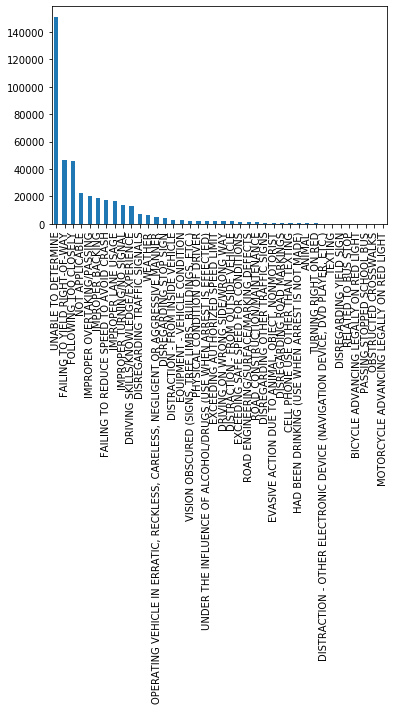

In [19]:
# visualizing the value counts for each feature in the PRIM_CONTRIBUTORY_CAUSE column
d.PRIM_CONTRIBUTORY_CAUSE.value_counts().plot(kind='bar')

In [34]:
# extracting the columns needed
columnss = ['PHYSICAL_CONDITION','DAMAGE','REPORT_TYPE','VEHICLE_TYPE',
            'VEHICLE_YEAR','UNIT_NO','NUM_UNITS','DEVICE_CONDITION',
            'CRASH_RECORD_ID','HIT_AND_RUN_I','VEHICLE_USE','DRIVERS_LICENSE_CLASS',
            'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE','DRIVER_VISION',
            'ROADWAY_SURFACE_COND','OCCUPANT_CNT','WEATHER_CONDITION', 'LIGHTING_CONDITION',
            'FIRST_CRASH_TYPE','BAC_RESULT','TRAFFICWAY_TYPE','CRASH_TYPE','LATITUDE','LONGITUDE',
            'PRIM_CONTRIBUTORY_CAUSE','INJURIES_TOTAL','EXCEED_SPEED_LIMIT_I',
            'INJURIES_FATAL','MANEUVER','DRIVER_ACTION','TRAVEL_DIRECTION','CRASH_HOUR',
            'CRASH_DAY_OF_WEEK','CRASH_MONTH', 'STREET','MOST_SEVERE_INJURY',
            'CRASH_YEAR', 'ROAD_DEFECT','ALIGNMENT',
            'AGE','LANE_CNT','INTERSECTION_RELATED_I',"CELL_PHONE_USE","NOT_RIGHT_OF_WAY_I"]

x = d[columnss]

In [35]:
# looking at the shape
x.shape

(415951, 45)

In [36]:
# changing the strings into boolean values in these columns
x.EXCEED_SPEED_LIMIT_I = x.EXCEED_SPEED_LIMIT_I.map(dict(Y=1, N=0))
x.CELL_PHONE_USE = x.CELL_PHONE_USE.map(dict(Y=1, N=0))
x.NOT_RIGHT_OF_WAY_I = x.NOT_RIGHT_OF_WAY_I.map(dict(Y=1, N=0))
x.INTERSECTION_RELATED_I = x.INTERSECTION_RELATED_I.map(dict(Y=1, N=0))

## Data Cleaning

In [37]:
# checking for missing values
pd.isnull(x).sum()

PHYSICAL_CONDITION           6050
DAMAGE                          0
REPORT_TYPE                  9130
VEHICLE_TYPE                 3679
VEHICLE_YEAR               107020
UNIT_NO                         0
NUM_UNITS                       1
DEVICE_CONDITION                0
CRASH_RECORD_ID                 0
HIT_AND_RUN_I              298284
VEHICLE_USE                  3679
DRIVERS_LICENSE_CLASS      189614
POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
DRIVER_VISION                6050
ROADWAY_SURFACE_COND            0
OCCUPANT_CNT                 3679
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
BAC_RESULT                   6050
TRAFFICWAY_TYPE                 0
CRASH_TYPE                      0
LATITUDE                     2268
LONGITUDE                    2268
PRIM_CONTRIBUTORY_CAUSE         0
INJURIES_TOTAL                893
EXCEED_SPEED_LIMIT_I       413832
INJURIES_FATAL                893
MANEUVER      

In [38]:
# dropping missing values
CL = ['LONGITUDE', 'DRIVER_ACTION', 'TRAVEL_DIRECTION', 'DRIVERS_LICENSE_CLASS',
     'DRIVER_VISION']

for col in CL:
    x.dropna(subset=[col], inplace = True)
# x.dropna(subset=['LONGITUDE'],  inplace = True)
# x.dropna(subset=['DRIVER_ACTION'],  inplace = True)
# x.dropna(subset=['TRAVEL_DIRECTION'],  inplace = True)
# x.dropna(subset=['DRIVERS_LICENSE_CLASS'],  inplace = True)
# x.dropna(subset=['DRIVER_VISION'],  inplace = True)

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
x

,PHYSICAL_CONDITION,DAMAGE,REPORT_TYPE,VEHICLE_TYPE,VEHICLE_YEAR,UNIT_NO,NUM_UNITS,DEVICE_CONDITION,CRASH_RECORD_ID,HIT_AND_RUN_I,...,STREET,MOST_SEVERE_INJURY,CRASH_YEAR,ROAD_DEFECT,ALIGNMENT,AGE,LANE_CNT,INTERSECTION_RELATED_I,CELL_PHONE_USE,NOT_RIGHT_OF_WAY_I
4,NORMAL,"$501 - $1,500",NOT ON SCENE (DESK REPORT),VAN/MINI-VAN,NaN,1,2.0,NO CONTROLS,f2b1adeb85a15112e4fb7db74bff440d6ca53ff7a21e10...,NaN,...,W DIVISION ST,NO INDICATION OF INJURY,2015,NO DEFECTS,STRAIGHT AND LEVEL,31.0,4,NaN,NaN,NaN
6,NORMAL,"$501 - $1,500",NOT ON SCENE (DESK REPORT),PASSENGER,2011.0,2,2.0,NO CONTROLS,15a3e24fce3ce7cd2b02d44013d1a93ff2fbdca80632ec...,NaN,...,W DEVON AVE,NO INDICATION OF INJURY,2015,NO DEFECTS,STRAIGHT AND LEVEL,29.0,2,NaN,NaN,NaN
13,NORMAL,"OVER $1,500",NOT ON SCENE (DESK REPORT),PASSENGER,2006.0,1,2.0,NO CONTROLS,c2f21fd14725cf30d43ae59057e59b2e225c9e62a846e7...,NaN,...,N PULASKI RD,NO INDICATION OF INJURY,2016,NO DEFECTS,STRAIGHT AND LEVEL,20.0,2,NaN,NaN,NaN
23,UNKNOWN,"OVER $1,500",NOT ON SCENE (DESK REPORT),SPORT UTILITY VEHICLE (SUV),2010.0,1,2.0,FUNCTIONING PROPERLY,befb68da3c19604991be7b4fbf610dafd964d88f0adf05...,NaN,...,W CHICAGO AVE,NO INDICATION OF INJURY,2016,WORN SURFACE,STRAIGHT AND LEVEL,30.0,4,NaN,NaN,NaN
25,UNKNOWN,"$501 - $1,500",NOT ON SCENE (DESK REPORT),PASSENGER,1995.0,1,2.0,FUNCTIONING PROPERLY,eb8139d5227d9f032a4ff868eb1889ab107715d12ccecc...,NaN,...,W BELMONT AVE,NO INDICATION OF INJURY,2015,NO DEFECTS,STRAIGHT AND LEVEL,20.0,2,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467375,NORMAL,"$501 - $1,500",NOT ON SCENE (DESK REPORT),SPORT UTILITY VEHICLE (SUV),2003.0,1,2.0,NO CONTROLS,2185a70d1abea9d811f7a1d28ca015d004a5cab6c3756e...,NaN,...,N BOSWORTH AVE,NO INDICATION OF INJURY,2020,NO DEFECTS,STRAIGHT AND LEVEL,25.0,NaN,NaN,NaN,NaN
1467428,NORMAL,$500 OR LESS,NOT ON SCENE (DESK REPORT),PICKUP,2016.0,1,2.0,FUNCTIONING PROPERLY,93b6d123038e8a0f1a4bfd5087db07047c9901c450d177...,NaN,...,N OGDEN AVE,NO INDICATION OF INJURY,2020,UNKNOWN,STRAIGHT AND LEVEL,27.0,NaN,1.0,NaN,NaN
1467455,UNKNOWN,"OVER $1,500",NOT ON SCENE (DESK REPORT),PASSENGER,2011.0,1,2.0,NO CONTROLS,2a5bb1fd666296e396b752df0d5bda5b3e4361311766e1...,NaN,...,S JEFFERY BLVD,NO INDICATION OF INJURY,2020,NO DEFECTS,STRAIGHT AND LEVEL,30.0,NaN,NaN,NaN,NaN
1467463,UNKNOWN,"OVER $1,500",NOT ON SCENE (DESK REPORT),PASSENGER,2014.0,1,2.0,NO CONTROLS,63c4a4d4ec62714efb999cb53decdc6ff4130da24979ef...,NaN,...,W OGDEN AVE,NO INDICATION OF INJURY,2020,UNKNOWN,STRAIGHT AND LEVEL,40.0,NaN,NaN,NaN,NaN


In [40]:
# filling missing values with the modes
CL = ["LANE_CNT", "AGE", "INJURIES_TOTAL", "BAC_RESULT", "OCCUPANT_CNT", "INJURIES_FATAL",
     "MOST_SEVERE_INJURY"]

for col in CL:
    x[col].fillna(x[col].mode()[0], inplace = True) 
    
# x["AGE"].fillna(x["AGE"].mode()[0], inplace = True)
# # x["VEHICLE_YEAR"].fillna(x["VEHICLE_YEAR"].mode()[0], inplace = True)
# # x["DRIVER_VISION"].fillna(x["DRIVER_VISION"].mode()[0], inplace = True)
# # x["MANEUVER"].fillna(x["MANEUVER"].mode()[0], inplace = True)

# x["AGE"].fillna(x["AGE"].mode()[0], inplace = True)
# x["INJURIES_TOTAL"].fillna(x["INJURIES_TOTAL"].mode()[0], inplace = True)
# x["BAC_RESULT"].fillna(x["BAC_RESULT"].mode()[0], inplace = True)
# x["OCCUPANT_CNT"].fillna(x["OCCUPANT_CNT"].mode()[0], inplace = True)
# x["INJURIES_FATAL"].fillna(x["INJURIES_FATAL"].mode()[0], inplace = True)
# x["MOST_SEVERE_INJURY"].fillna(x["MOST_SEVERE_INJURY"].mode()[0], inplace = True)


C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [101]:
# changing the times in the crash hour column into time periods
x['TIME'] = x['CRASH_HOUR'].map(lambda x: 'After midnight' if (x <= 6) else 'Morning' if (x >= 6 and x <= 12) 
                                      else 'Afternoon' if (x >= 12 and x <= 18) else 'Night')

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
# checking for null values
pd.isnull(x).sum()


PHYSICAL_CONDITION              0
DAMAGE                          0
REPORT_TYPE                  5433
VEHICLE_TYPE                    0
VEHICLE_YEAR                10926
UNIT_NO                         0
NUM_UNITS                       0
DEVICE_CONDITION                0
CRASH_RECORD_ID                 0
HIT_AND_RUN_I              214022
VEHICLE_USE                     0
DRIVERS_LICENSE_CLASS           0
POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
DRIVER_VISION                   0
ROADWAY_SURFACE_COND            0
OCCUPANT_CNT                    0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
BAC_RESULT                      0
TRAFFICWAY_TYPE                 0
CRASH_TYPE                      0
LATITUDE                        0
LONGITUDE                       0
PRIM_CONTRIBUTORY_CAUSE         0
INJURIES_TOTAL                  0
EXCEED_SPEED_LIMIT_I       221433
INJURIES_FATAL                  0
MANEUVER      

In [43]:
# checking the amount of each unique member of the PRIM_CONTRIBUTORY_CAUSE column
x['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 63726
FAILING TO YIELD RIGHT-OF-WAY                                                       31696
FOLLOWING TOO CLOSELY                                                               28516
FAILING TO REDUCE SPEED TO AVOID CRASH                                              10880
IMPROPER BACKING                                                                    10458
IMPROPER OVERTAKING/PASSING                                                         10278
IMPROPER LANE USAGE                                                                  9536
IMPROPER TURNING/NO SIGNAL                                                           9078
NOT APPLICABLE                                                                       8716
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  7706
WEATHER                                                                              5144
DISREGARDI

In [44]:
# checking the amount of each unique member of the DEVICE_CONDITION column
x.DEVICE_CONDITION.value_counts()

NO CONTROLS                 120625
FUNCTIONING PROPERLY         86967
UNKNOWN                      10440
OTHER                         1826
FUNCTIONING IMPROPERLY        1445
NOT FUNCTIONING                774
WORN REFLECTIVE MATERIAL       127
MISSING                         35
Name: DEVICE_CONDITION, dtype: int64

In [45]:
x.columns = x.columns.str.strip()

In [46]:
# removing punctuations
x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace(r'[^\w\s]+', '')

# trimming down targets by categorizing similar targets into one
CL = ['DISTRACTION  OTHER ELECTRONIC DEVICE NAVIGATION DEVICE DVD PLAYER ETC', 'CELL PHONE USE OTHER THAN TEXTING',
    'TEXTING' ]

for row in CL:
    x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace(row,'DISTRACTION  FROM INSIDE VEHICLE')


CL = ['MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT', 'BICYCLE ADVANCING LEGALLY ON RED LIGHT']

for row in CL:
    x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace(row,'CYCLE ADVANCING LEGALLY ON RED LIGHT')

    #x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('BICYCLE ADVANCING LEGALLY ON RED LIGHT','CYCLE ADVANCING LEGALLY ON RED LIGHT')

    
CL = ['UNDER THE INFLUENCE OF ALCOHOLDRUGS USE WHEN ARREST IS EFFECTED', 'PHYSICAL CONDITION OF DRIVER'
     ,'HAD BEEN DRINKING USE WHEN ARREST IS NOT MADE','OPERATING VEHICLE IN ERRATIC RECKLESS CARELESS NEGLIGENT OR AGGRESSIVE MANNER' ]
    
for row in CL:
    x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace(row, 'INTOXICATED/PHYSICAL CONDITION')

CL = ['ROAD CONSTRUCTIONMAINTENANCE', 'ROAD ENGINEERINGSURFACEMARKING DEFECTS']

for row in CL:
    x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace(row,'ROAD CONDITIONS')
    
CL = ['DISREGARDING OTHER TRAFFIC SIGNS', 'DISREGARDING ROAD MARKINGS', 'DISREGARDING STOP SIGN', 'DRIVING ON WRONG SIDEWRONG WAY',
     'DISREGARDING YIELD SIGN']
    
for row in CL:
    x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace(row,'DISREGARDING TRAFFIC SIGNALS')


CL = ['EVASIVE ACTION DUE TO ANIMAL OBJECT NONMOTORIST', 'ANIMAL', 'OBSTRUCTED CROSSWALKS', 'VISION OBSCURED SIGNS TREE LIMBS BUILDINGS ETC']

for row in CL:
    x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace(row,'DISTRACTION  FROM OUTSIDE VEHICLE')

CL = ['EXCEEDING AUTHORIZED SPEED LIMIT', 'FAILING TO REDUCE SPEED TO AVOID CRASH','EXCEEDING SAFE SPEED FOR CONDITIONS', 'TURNING RIGHT ON RED' ]
for row in CL:
    x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace(row,'SPEED RELATED')

x['PRIM_CONTRIBUTORY_CAUSE'] = x['PRIM_CONTRIBUTORY_CAUSE'].str.replace('PASSING STOPPED SCHOOL BUS','RELATED TO BUS STOP')



C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [47]:
# some more of trimming the targets
x = x[(x.PRIM_CONTRIBUTORY_CAUSE != "UNABLE TO DETERMINE")]
x = x[(x.PRIM_CONTRIBUTORY_CAUSE != "NOT APPLICABLE")]
x = x[(x.PRIM_CONTRIBUTORY_CAUSE != "CYCLE ADVANCING LEGALLY ON RED LIGHT")]
x = x[(x.PRIM_CONTRIBUTORY_CAUSE != "RELATED TO BUS STOP")]

# removing an outlier
x = x[(x.LANE_CNT != '433,634')]

In [48]:
# checking the shape
x.shape

(149687, 45)

In [49]:
# saving the new an improved dataframe
x.to_csv('dx.csv')

# Model

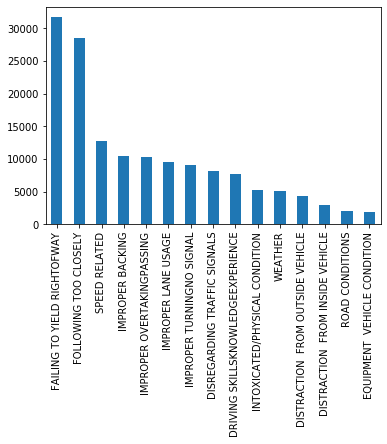

In [3]:
# loading dataset
dx = pd.read_csv('dx.csv')
dx.PRIM_CONTRIBUTORY_CAUSE.value_counts().plot(kind='bar')


In [4]:
# Function to calculate the ROC score
def multiclass_roc_auc_score(y_test, y_pred, average="micro"):
    # binarizing my features
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


In [5]:
# function for plotting the confusion matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [6]:
# function for calculating evaluation matrix
def metricsscors(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds,average='micro')))
    print("Recall Score: {}".format(recall_score(labels, preds,average='micro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds,average='micro')))

In [7]:
# function for plotting the featur importance
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    

In [8]:
# function for showing the time while the RandomizedSearchCV
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        

In [9]:
def plot_top_features(model, dd, title=''):
    '''
    Plots the top important features of a tree based model
    
    Args:
        Model (classification model): SKlearn compatable model
        xtrain (dataframe or array): feature columns for the training set
        title (str): Title for the plot
        
    Returns:
        Plotted figure of feature importances for the model
    
    Example:
        plot_top_features(rf_model, X_train, title='Random Forest Model')
    '''
    X = dd.drop(['CAUSE OF ACCIDENT'], axis=1)
    
    # Turn the feature importances into a series 
    importances = pd.Series(model.feature_importances_, index=X.columns)
    
    # Plot the top most important features
    importances.nlargest(20).sort_values().plot(kind='barh')
    plt.title(f'Most Important Features For {title}', fontdict={'fontsize':17})
    plt.xlabel('Importance')
    return importances.sort_values(ascending=False)

In [10]:
# converting certain columns to srting and float
clstr = ['DRIVER_VISION', 'DRIVER_ACTION', 'DEVICE_CONDITION', 
         'PHYSICAL_CONDITION','FIRST_CRASH_TYPE','ROADWAY_SURFACE_COND', 
      'PRIM_CONTRIBUTORY_CAUSE']

for x in clstr:
    dx[x] = dx[x].astype(str)
    
clfloat = ['AGE','POSTED_SPEED_LIMIT']

for x in clfloat:
    dx[x] = dx[x].astype(float)

# removing the underscore form column names
# colum = ['DRIVER_VISION', 'DRIVER_ACTION', 'DEVICE_CONDITION', 
#          'PHYSICAL_CONDITION','FIRST_CRASH_TYPE']

# for x in colum:
#     dx[x] = dx[x].str.replace('_',' ')

# dx['DRIVER VISION'] = dx['DRIVER_VISION'].astype(str)
# dx['DRIVER ACTION'] = dx['DRIVER_ACTION'].astype(str
# dx['DEVICE CONDITION'] = dx['DEVICE_CONDITION'].astype(str)
# dx['AGE'] = dx['AGE'].astype(float)
# dx['PHYSICAL CONDITION'] = dx['PHYSICAL_CONDITION'].astype(str)
# dx['FIRST CRASH TYPE'] = dx['FIRST_CRASH_TYPE'].astype(str)

# changing column names
dx['SPEED LIMIT'] = dx['POSTED_SPEED_LIMIT']
dx['ROADWAY CONDITION'] = dx['ROADWAY_SURFACE_COND']
dx['CAUSE OF ACCIDENT'] = dx['PRIM_CONTRIBUTORY_CAUSE']

# dropping an unneccessary column
dx.drop(dx.columns[dx.columns.str.contains('unnamed', case = False)],axis = 1, inplace = True)
dx.columns = dx.columns.str.replace('_',' ')

In [11]:
dx.columns

Index(['PHYSICAL CONDITION', 'DAMAGE', 'REPORT TYPE', 'VEHICLE TYPE',
       'VEHICLE YEAR', 'UNIT NO', 'NUM UNITS', 'DEVICE CONDITION',
       'CRASH RECORD ID', 'HIT AND RUN I', 'VEHICLE USE',
       'DRIVERS LICENSE CLASS', 'POSTED SPEED LIMIT', 'TRAFFIC CONTROL DEVICE',
       'DRIVER VISION', 'ROADWAY SURFACE COND', 'OCCUPANT CNT',
       'WEATHER CONDITION', 'LIGHTING CONDITION', 'FIRST CRASH TYPE',
       'BAC RESULT', 'TRAFFICWAY TYPE', 'CRASH TYPE', 'LATITUDE', 'LONGITUDE',
       'PRIM CONTRIBUTORY CAUSE', 'INJURIES TOTAL', 'EXCEED SPEED LIMIT I',
       'INJURIES FATAL', 'MANEUVER', 'DRIVER ACTION', 'TRAVEL DIRECTION',
       'CRASH HOUR', 'CRASH DAY OF WEEK', 'CRASH MONTH', 'STREET',
       'MOST SEVERE INJURY', 'CRASH YEAR', 'ROAD DEFECT', 'ALIGNMENT', 'AGE',
       'LANE CNT', 'INTERSECTION RELATED I', 'CELL PHONE USE',
       'NOT RIGHT OF WAY I', 'TIME', 'SPEED LIMIT', 'ROADWAY CONDITION',
       'CAUSE OF ACCIDENT'],
      dtype='object')

## Handling the Imbalance
The dataset is heavily imbalanced so Ill use the SMOTE technique to help balnce the dataset

In [12]:
# extracting needed columns
CL =['CAUSE OF ACCIDENT','DRIVER VISION', 'DRIVER ACTION','SPEED LIMIT', 'AGE', 'PHYSICAL CONDITION',
       'ROADWAY CONDITION','DEVICE CONDITION', 'FIRST CRASH TYPE']

d = dx[CL]
dm = d

# getting dummies
dd=pd.get_dummies(dm, columns= ['DRIVER VISION', 'DRIVER ACTION','PHYSICAL CONDITION',
       'ROADWAY CONDITION','DEVICE CONDITION', 'FIRST CRASH TYPE'], drop_first=True)


In [13]:
dd.columns

Index(['CAUSE OF ACCIDENT', 'SPEED LIMIT', 'AGE',
       'DRIVER VISION_BLINDED - SUNLIGHT', 'DRIVER VISION_BLOWING MATERIALS',
       'DRIVER VISION_BUILDINGS', 'DRIVER VISION_EMBANKMENT',
       'DRIVER VISION_HILLCREST', 'DRIVER VISION_MOVING VEHICLES',
       'DRIVER VISION_NOT OBSCURED', 'DRIVER VISION_OTHER',
       'DRIVER VISION_PARKED VEHICLES', 'DRIVER VISION_SIGNBOARD',
       'DRIVER VISION_TREES, PLANTS', 'DRIVER VISION_UNKNOWN',
       'DRIVER VISION_WINDSHIELD (WATER/ICE)',
       'DRIVER ACTION_DISREGARDED CONTROL DEVICES',
       'DRIVER ACTION_EMERGENCY VEHICLE ON CALL',
       'DRIVER ACTION_EVADING POLICE VEHICLE', 'DRIVER ACTION_FAILED TO YIELD',
       'DRIVER ACTION_FOLLOWED TOO CLOSELY', 'DRIVER ACTION_IMPROPER BACKING',
       'DRIVER ACTION_IMPROPER LANE CHANGE', 'DRIVER ACTION_IMPROPER PARKING',
       'DRIVER ACTION_IMPROPER PASSING', 'DRIVER ACTION_IMPROPER TURN',
       'DRIVER ACTION_LICENSE RESTRICTIONS', 'DRIVER ACTION_NONE',
       'DRIVER ACTION_OTHER

In [14]:
# defining x and y as the features and targets 
X = dd.drop(['CAUSE OF ACCIDENT'], axis=1)
y = dd[['CAUSE OF ACCIDENT']] 

# performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

# standardizing the data
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# hanlding the imbalance with SMOTE
smote = SMOTE(k_neighbors=6)
X_train, y_train = smote.fit_sample(X_train, y_train)

KeyboardInterrupt: 

# Logistic Regression

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 62.02 
AUC : 0.796543809587433


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

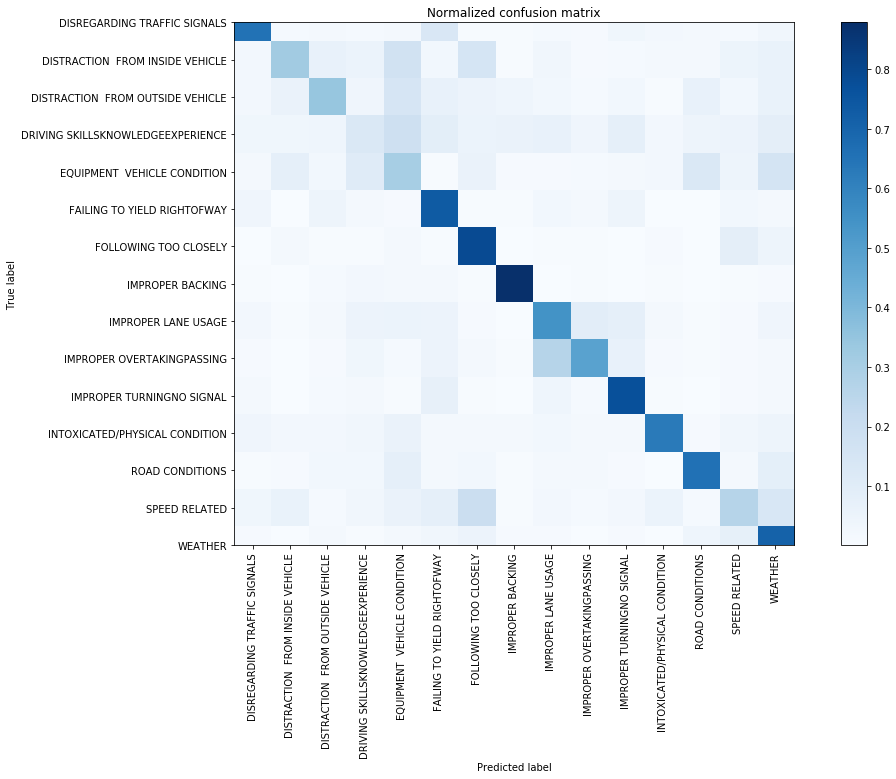

In [43]:
## Logreg with SMOTE ##

logreg =LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=200)

logreg.fit(X_train, y_train.values.ravel())
y_pred = logreg.predict(X_test)


acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy: {} '.format(acc_logreg))
print('AUC : {}'.format(multiclass_roc_auc_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred) 

dummies = pd.get_dummies(dd['CAUSE OF ACCIDENT']) # Classification
name = dummies.columns

#Normalized CM
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name,title='Normalized confusion matrix')
plt.xticks(rotation=90)

# Logistic Regression Testing

Log Loss: 13.11730535139739
AUC: 0.796543809587433
Precision Score: 0.620215111229875
Recall Score: 0.620215111229875
Accuracy Score: 0.620215111229875
F1 Score: 0.620215111229875


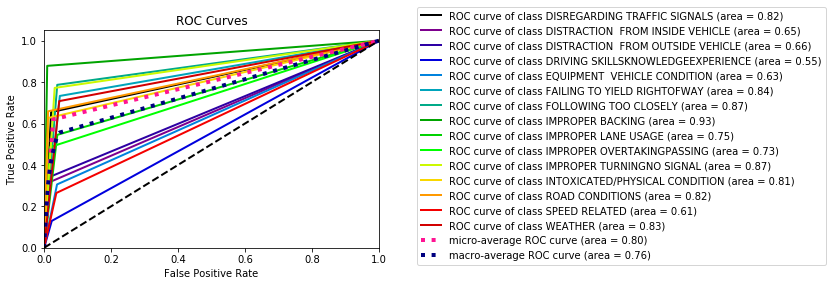

In [45]:
# Logreg Testing

y_predi = logreg.predict(X_test)
y_testi = y_test
lb = LabelBinarizer()
lb.fit(y_predi)
y_predi = lb.transform(y_pred)

print('Log Loss: {}'.format(metrics.log_loss(y_testi, y_predi)))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))
metricsscors(y_test, y_pred)

skplt.metrics.plot_roc(y_testi, y_predi)
plt.legend(loc='lower left', bbox_to_anchor=(1.1, -0.1), ncol=1, fancybox=True)
plt.show()

# Random Forest

Accuracy: 61.73 
AUC : 0.7950049149194048


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

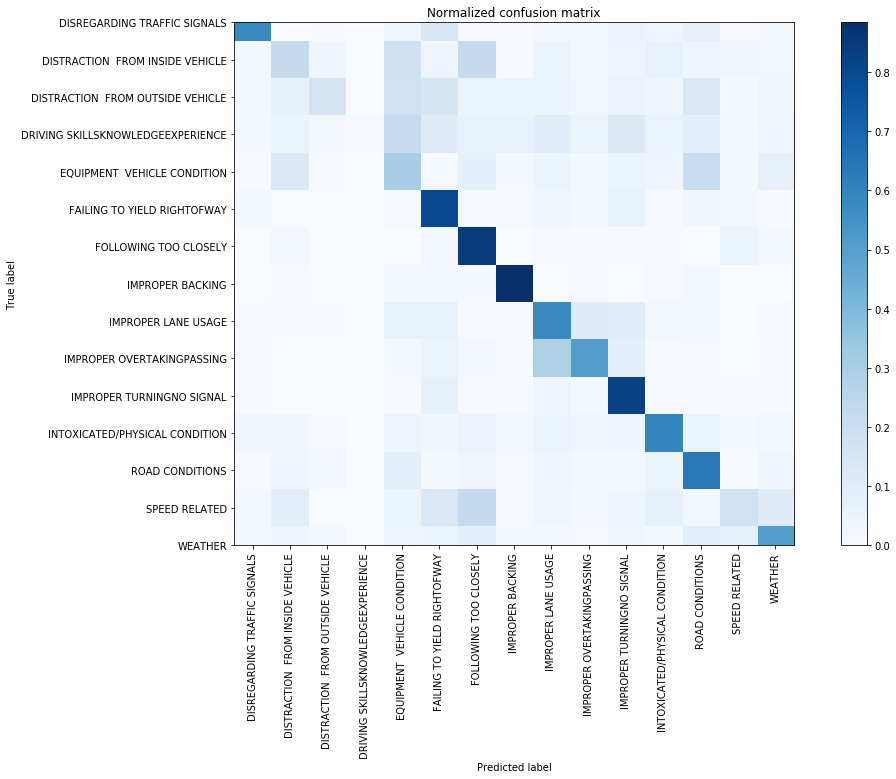

In [27]:
## RF with SMOTE ##
rand=RandomForestClassifier(max_depth=7, n_estimators=250, random_state=42)

rand.fit(X_train, y_train.values.ravel())
y_pred = rand.predict(X_test)


acc_rand = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy: {} '.format(acc_rand))
print('AUC : {}'.format(multiclass_roc_auc_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred) 
dummies = pd.get_dummies(dd['CAUSE OF ACCIDENT']) # Classification
name = dummies.columns

#Normalized CM
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name,title='Normalized confusion matrix')
plt.xticks(rotation=90)

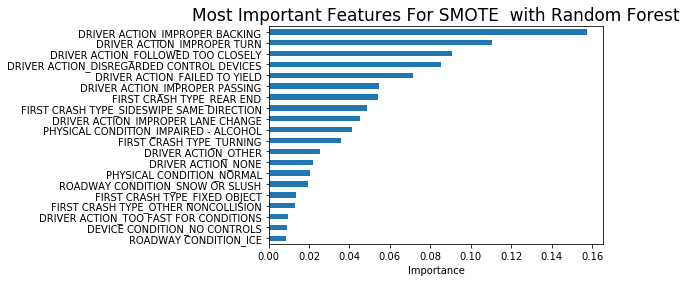

In [34]:
# Plotting the feature importances
rand_importances = plot_top_features(rand, dd, title='SMOTE  with Random Forest')


# Random Forest Testing

Log Loss: 13.2165215572215
AUC: 0.7950049149194048
Precision Score: 0.6173425078495558
Recall Score: 0.6173425078495558
Accuracy Score: 0.6173425078495558
F1 Score: 0.6173425078495558


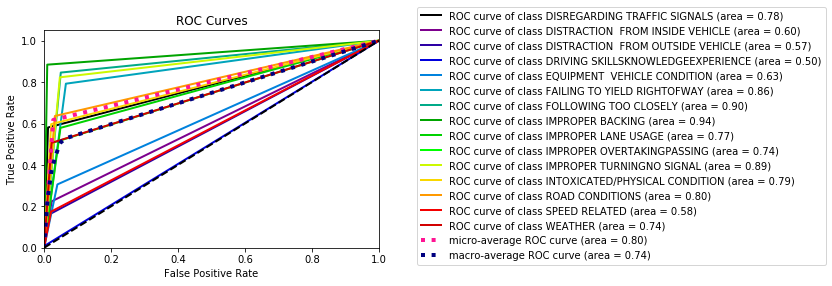

In [36]:
y_predi = rand.predict(X_test)
y_testi = y_test
lb = LabelBinarizer()
lb.fit(y_predi)
y_predi = lb.transform(y_pred)

print('Log Loss: {}'.format(metrics.log_loss(y_testi, y_predi)))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))
metricsscors(y_test, y_pred)

skplt.metrics.plot_roc(y_testi, y_predi)
plt.legend(loc='lower left', bbox_to_anchor=(1.1, -0.1), ncol=1, fancybox=True)
plt.show()

## Hyper-Parameter Tuning
In order to find the most optimal parameters for the Random Forest Classifier

In [55]:
# assigning parameters to try

ran_params={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }
# fitting the RandomForestClassifier and running the parameter search
classifier_rand = RandomForestClassifier(random_state=42)

random_search_rand=RandomizedSearchCV(classifier_rand,param_distributions=ran_params,
                                 n_iter=5,scoring='roc_auc',
                                 n_jobs=1,cv=5,verbose=3) #change cv=3


#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_rand.fit(X_train, y_train.values.ravel())
#timer(start_time) # timing ends here for "start_time" variable

# displaying the best parameters
random_search_rand.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=2, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=2, n_estimators=300, score=0.637, total= 7.4min
[CV] bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=2, n_estimators=300 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.4min remaining:    0.0s


[CV]  bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=2, n_estimators=300, score=0.674, total= 6.9min
[CV] bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=2, n_estimators=300 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 14.3min remaining:    0.0s


[CV]  bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=2, n_estimators=300, score=0.680, total= 6.6min
[CV] bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=2, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=2, n_estimators=300, score=0.680, total= 6.6min
[CV] bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=2, n_estimators=300 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, min_samples_leaf=2, n_estimators=300, score=0.678, total= 6.7min
[CV] bootstrap=False, criterion=gini, max_depth=3, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_depth=3, min_samples_leaf=2, n_estimators=200, score=0.500, total=  51.4s
[CV] bootstrap=False, criterion=gini, max_depth=3, min_samples_leaf=2, n_estimators=200 
[CV]  bootstrap=False, criterion=gini, max_depth=3, min_samples_leaf=2, n_estimators=200, score=0.506, total=  59.2s
[CV] bootstrap=False, criterion=gi

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 82.7min finished


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'n_estimators': 300}

## Modeling with The Best Parameters

Accuracy: 61.86 
AUC : 0.7956669975091379


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

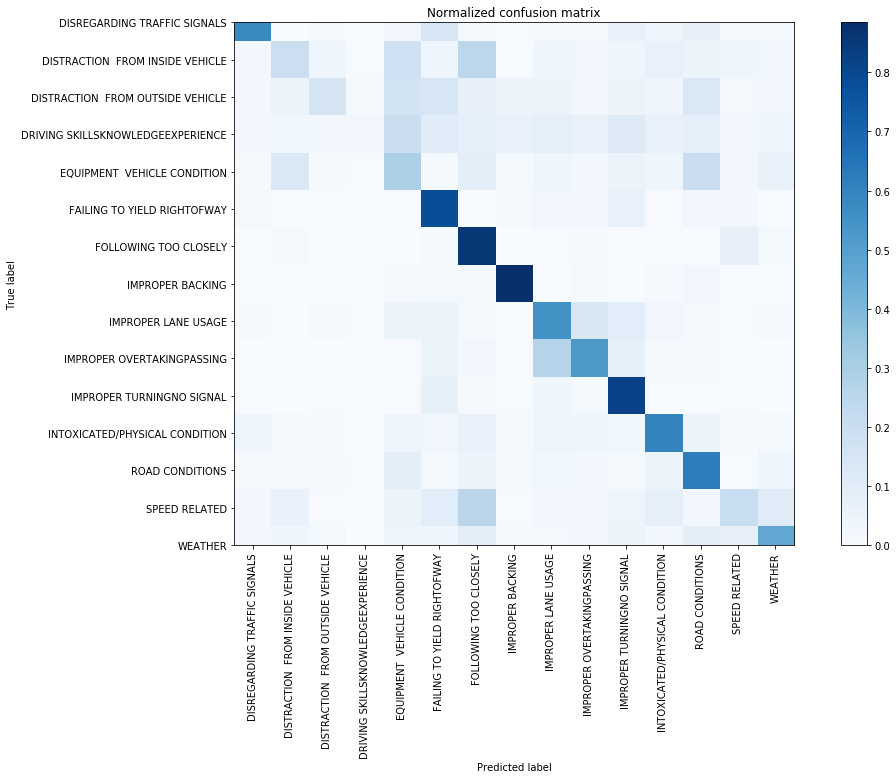

In [65]:
## X Boosting ##
rand_search=RandomForestClassifier(max_depth=7, n_estimators=300, random_state=42, bootstrap = True, 
                                   criterion = 'entropy',min_samples_leaf=2)

#fitting the data into the model 
rand_search.fit(X_train, y_train.values.ravel())

# making pedictions using the model
y_pred = rand_search.predict(X_test)

# printing the evaluations i.e Accuracy and AUC score
acc_rand_search = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy: {} '.format(acc_rand_search))
print('AUC : {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

# making a confusion matrix to display how the model performs
cm = confusion_matrix(y_test, y_pred) 
# getting dummies for the target columns to plot th e confusion matrix
dummies = pd.get_dummies(dd['CAUSE OF ACCIDENT'])
name = dummies.columns

#Normalized CM
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name, title='Normalized confusion matrix')
plt.xticks(rotation=90)

# Random Forest Testing with Best Parameters

Log Loss: 13.173835515180896
AUC: 0.7956669975091379
Precision Score: 0.6185783953503908
Recall Score: 0.6185783953503908
Accuracy Score: 0.6185783953503908
F1 Score: 0.6185783953503908


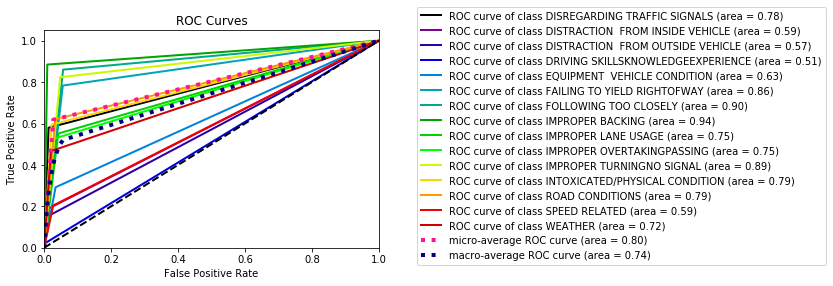

In [60]:
# making predictions
y_predi = rand_search.predict(X_test)

# transforming the target variables in th dummies in order to plot the roc curve
lb = LabelBinarizer()
lb.fit(y_predi)
y_predi = lb.transform(y_pred)

# printing evaluations
print('Log Loss: {}'.format(metrics.log_loss(y_testi, y_predi)))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))
metricsscors(y_test, y_pred)

# plotting roc curve
skplt.metrics.plot_roc(y_testi, y_predi)
plt.legend(loc='lower left', bbox_to_anchor=(1.1, -0.1), ncol=1, fancybox=True)
plt.show()

# XGBoost

Accuracy: 63.73 
AUC : 0.8056877069753681


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

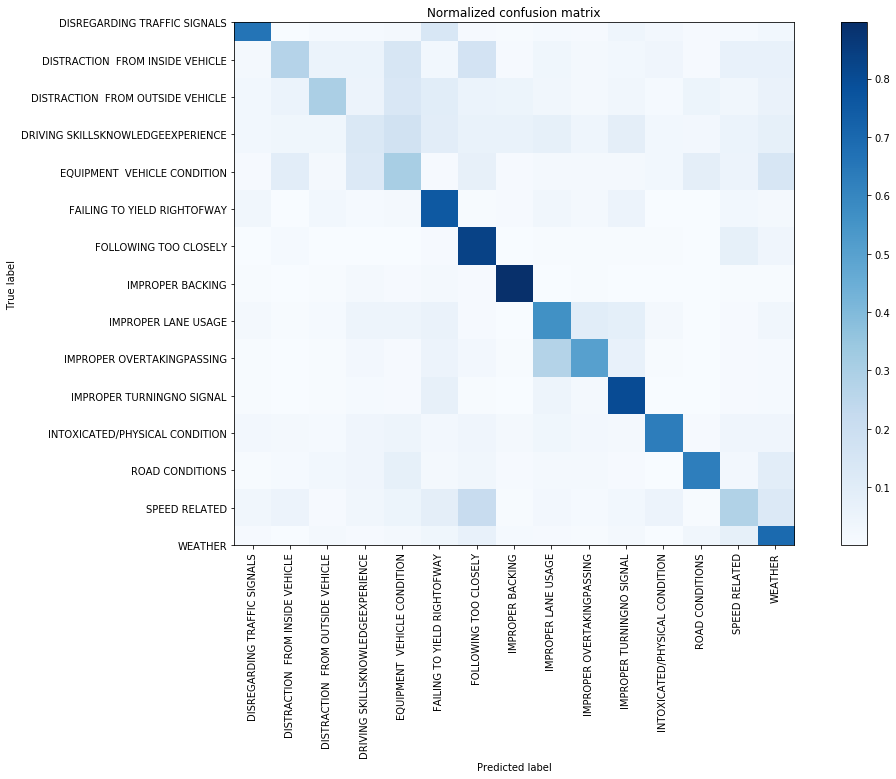

In [39]:
## X Boosting ##
import xgboost as xgb
xgboost= xgb.XGBClassifier(objective='multi:softmax', random_state=42, max_depth=3, gamma=1)

xgboost.fit(X_train, y_train.values.ravel())
y_pred = xgboost.predict(X_test)

acc_xgb = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy: {} '.format(acc_xgb))
print('AUC : {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred) 
dummies = pd.get_dummies(dx['CAUSE OF ACCIDENT']) # Classification
name = dummies.columns

#Normalized CM
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name)
plt.xticks(rotation=90)

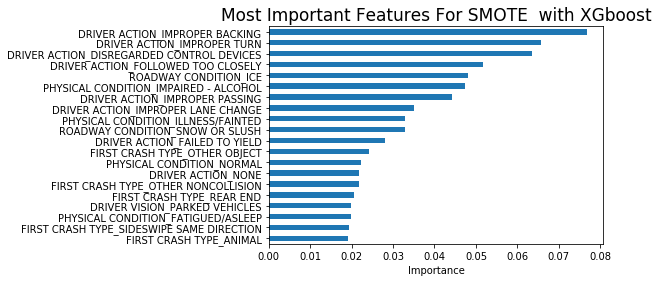

In [41]:
# Plotting the feature importances
xgboost_importances = plot_top_features(xgboost, dd, title='SMOTE  with XGboost')


## XGBoost Testing

Log Loss: 12.527776500512246
AUC: 0.8056877069753681
Precision Score: 0.6372837196873539
Recall Score: 0.6372837196873539
Accuracy Score: 0.6372837196873539
F1 Score: 0.6372837196873539


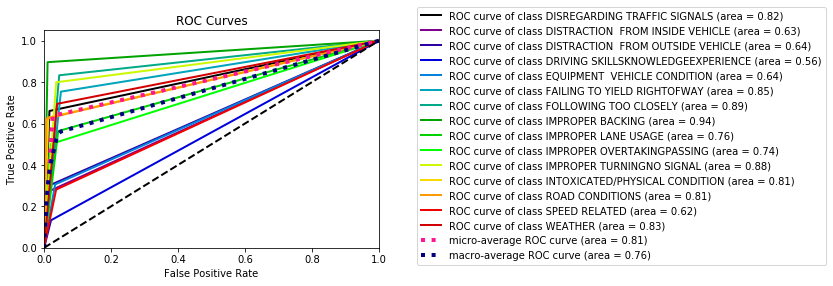

In [42]:
# making predictions
y_predi = xgboost.predict(X_test)

# transforming the target variables in th dummies in order to plot the roc curve
lb = LabelBinarizer()
lb.fit(y_predi)
y_predi = lb.transform(y_pred)

# printing evaluations
print('Log Loss: {}'.format(metrics.log_loss(y_testi, y_predi)))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))
metricsscors(y_test, y_pred)

# plotting roc curve
skplt.metrics.plot_roc(y_testi, y_predi)
plt.legend(loc='lower left', bbox_to_anchor=(1.1, -0.1), ncol=1, fancybox=True)
plt.show()

## Hyper-Parameter Tuning
In order to find the most optimal parameters for the XGBoost Classifier

In [68]:
# assigning parameters to try
import xgboost as xgb
xgbparams={
 "learning_rate"    : [ 0.15, 0.20] ,
 "max_depth"        : [ 10, 12, 15],
 "min_child_weight" : [ 1, 3,],
 "gamma"            : [ 0.3, 0.4],
 "colsample_bytree" : [ 0.5 , 0.7 ]
    
}    
# fitting the xgboost classifier and running the parameter search
xgbclassifier=xgb.XGBClassifier()
random_search_xgb=RandomizedSearchCV(xgbclassifier,param_distributions=xgbparams,
                                 n_iter=5,scoring='accuracy',n_jobs=1,cv=3,verbose=3)


#start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_xgb.fit(X_train, y_train.values.ravel())
#timer(start_time) # timing ends here for "start_time" variable

# displaying the best parameters
random_search_xgb.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.5, score=0.636, total=28.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 28.0min remaining:    0.0s


[CV] min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.5, score=0.680, total=24.7min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 52.8min remaining:    0.0s


[CV] min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.5 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.5, score=0.677, total=24.7min
[CV] min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, score=0.640, total=35.0min
[CV] min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, score=0.689, total=33.3min
[CV] min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=1, max_depth=12, learning_rate=0.15, gamma=0.3, colsample_bytree=0.7, score=0.686, total=33.1min
[CV] min_child_weight=3, max_depth=12, learning_rate=0.2, gamma=0.3, colsample_bytree=0.5 
[CV]  min_child_weight=3, max_depth=12, learning_rate=0.2, ga

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 407.6min finished


{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

## Modeling with The Best Parameters

Accuracy: 63.94 
AUC : 0.8068150367903191


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

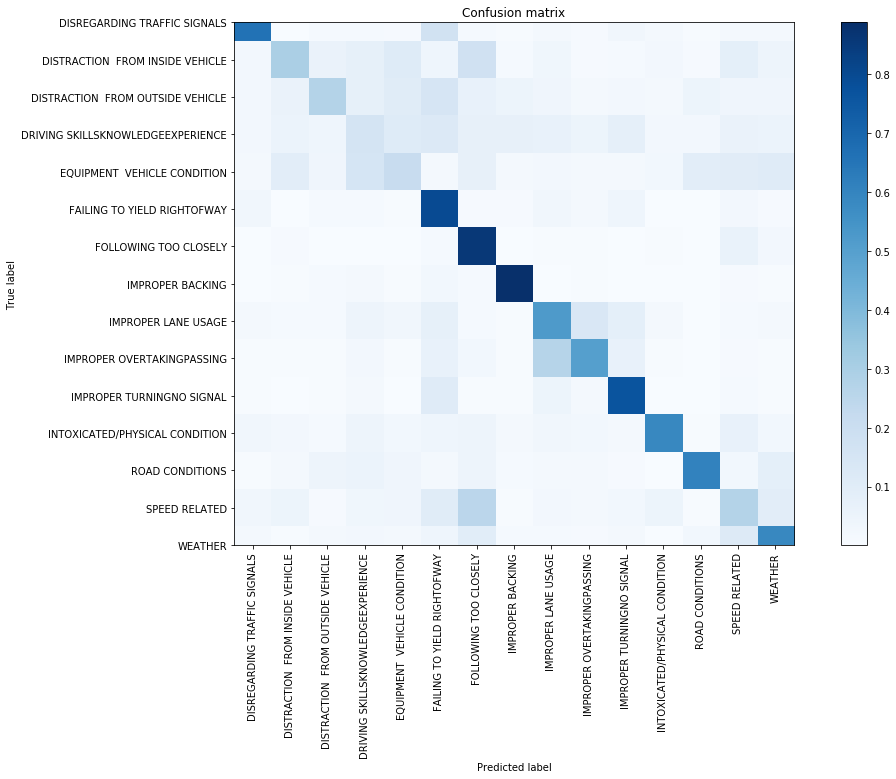

In [69]:
## X Boosting ##
xgbsearch = XGBClassifier(objective='multi:softmax',num_class=14, subsample= 0.7, random_state=42, 
                     max_depth= 12, min_child_weight = 1, learning_rate= 0.2, 
                          gamma=0.4,colsample_bytree= 0.7)

#fitting the data into the model 
xgbsearch.fit(X_train, y_train.values.ravel())

# making pedictions using the model
y_pred = xgbsearch.predict(X_test)

# printing the evaluations i.e Accuracy and AUC score
acc_xgbsearch = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy: {} '.format(acc_xgbsearch))
print('AUC : {}'.format(multiclass_roc_auc_score(y_test, y_pred)))


# making a confusion matrix to display how the model performs
cm = confusion_matrix(y_test, y_pred) 
# getting dummies for the target columns to plot th e confusion matrix
dummies = pd.get_dummies(dd['CAUSE OF ACCIDENT'])
name = dummies.columns

#Normalized CM
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name)
plt.xticks(rotation=90)

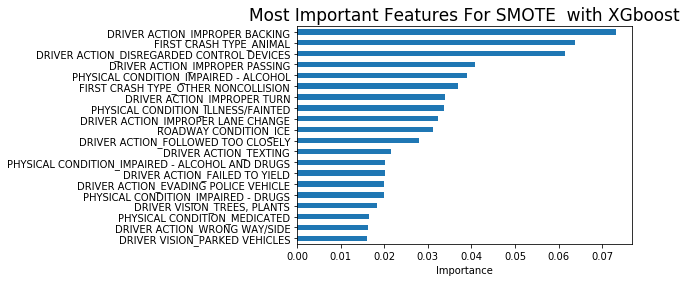

In [74]:
# Plotting the feature importances
xgboost_importances = plot_top_features(xgbsearch, dd, title='SMOTE  with XGboost')

# X Boosting Testing

Log Loss: 12.455094861362022
AUC: 0.8068150367903191
Precision Score: 0.6393880686752622
Recall Score: 0.6393880686752622
Accuracy Score: 0.6393880686752622
F1 Score: 0.6393880686752622


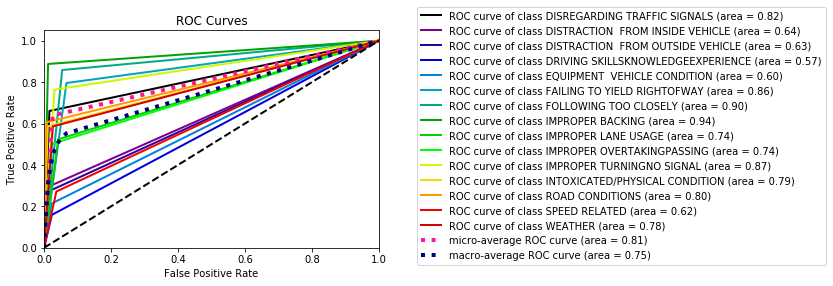

In [70]:
# making predictions
y_predi = xgbsearch.predict(X_test)

# transforming the target variables in th dummies in order to plot the roc curve
lb = LabelBinarizer()
lb.fit(y_predi)
y_predi = lb.transform(y_pred)

# printing evaluations
print('Log Loss: {}'.format(metrics.log_loss(y_testi, y_predi)))
print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))
metricsscors(y_test, y_pred)

# plotting roc curve
skplt.metrics.plot_roc(y_testi, y_predi)
plt.legend(loc='lower left', bbox_to_anchor=(1.1, -0.1), ncol=1, fancybox=True)
plt.show()

In [71]:
## Save model
import pickle
file_name = "xgb.sav"

pickle.dump(xgbsearch, open(file_name, "wb"))

In [73]:
# loading model
filename = "xgb.sav"
model = pickle.load(open(filename, 'rb'))

## Conclusion
Random Forest, X Boosting & LinearSVC classifiers where implimented after re-sampling with SMOTE since the dataset was heavily imbalanced and they all gave roughly the same results. So I opted to go with X Boosting classifier and the features included where:

* Driver’s Action
* Driver’s Vision
* Roadway Surface Condition
* Device Condition
* First Crash Type
* Posted Speed Limit
* Age
* Physical Condition

The model gave a log loss of 12.5 which and accuracy of 64%. This means the amount the model penelizes for incorrect predictions 12.5 but it only predicted 64% of the primary causes of accidents accurately.



Its total recall is 64% which is the total amount of times the model classified the cause of an accident was a category correctly out of the total amount of times that category was indeed the cause.

Its total precision is 64% and this is the total amount of times the model classified the cause of an accident was a category correctly out of the total amount of the predictions made for that category.

The AUC score is 0.8 and this is the average probability that the model can classifiy each class correctly.

The main metrics we'll focus on for this would be recall and the AUC score as we won't want to incorrectly classify the cause of an accident and risk wrongfully blaming a driver for an accident when it might have been something else.


## Future Work
* Road Type Division: Segregate the different types of streets/roads to understand the unique properties of accidents that occurs in each

* More Data: Gather more data like if a driver was on the phone, exceeded the posted speed limit or or has a good amount of driving experience .

* Region Division: Deeper analysis on the primary causes of accidents in the North, South, East West and Central regions of the city.

# Visualizations

In [50]:
# importing the merged dataframe
dx = pd.read_csv('dx.csv')

In [51]:
# dropping unneccessary column
dx.drop(dx.columns[dx.columns.str.contains('unnamed', case = False)],axis = 1, inplace = True)

In [52]:
# displaying the dataframe shape
dx.shape

(149687, 45)

In [53]:
# displaying the crash hour column
dx.CRASH_HOUR

0                  Night
1              Afternoon
2              Afternoon
3         After midnight
4              Afternoon
               ...      
149682             Night
149683             Night
149684             Night
149685             Night
149686         Afternoon
Name: CRASH_HOUR, Length: 149687, dtype: object

In [54]:
# making varables for the value counts for first crash type (needed for plotting a pie chart)
pie_plot  = dx['FIRST_CRASH_TYPE'].value_counts()

# turning the vlaue count into percentages of the entire dataset
percent = (pie_plot*100)/pie_plot.sum()

In [55]:
# displaying the percentages
percent

REAR END                        28.970452
TURNING                         18.784530
SIDESWIPE SAME DIRECTION        15.997381
ANGLE                           13.438709
PARKED MOTOR VEHICLE            11.297574
FIXED OBJECT                     4.467990
PEDESTRIAN                       1.814453
SIDESWIPE OPPOSITE DIRECTION     1.275996
HEAD ON                          0.913907
PEDALCYCLIST                     0.869815
OTHER OBJECT                     0.795660
REAR TO FRONT                    0.459626
OTHER NONCOLLISION               0.352068
REAR TO SIDE                     0.316661
REAR TO REAR                     0.090856
ANIMAL                           0.086848
OVERTURNED                       0.062798
TRAIN                            0.004676
Name: FIRST_CRASH_TYPE, dtype: float64

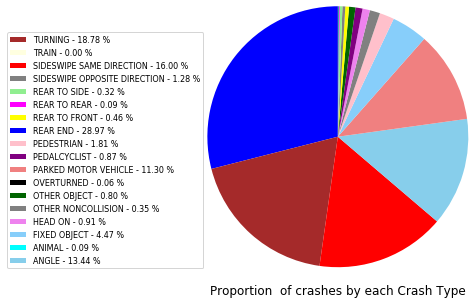

In [56]:
# plotting the piechart
colors = ['blue','brown','red','skyblue','lightcoral','lightskyblue','pink','grey','violet','purple', 'darkgreen','yellow','grey','lightgreen','magenta','cyan','black','lightyellow']
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
patches, texts = plt.pie(pie_plot, startangle=90,explode = explode,colors=colors, radius=1.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(pie_plot.index,percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, pie_plot.index),
                                          key=lambda pie_plot: pie_plot[2],
                                          reverse=True));

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8);
plt.title('Proportion  of crashes by each Crash Type', y = -0.25  );

# saving the pie chart
# plt.savefig('piechart.png', bbox_inches='tight');

In [57]:
# excluding certain rows in order to plot a new pie chart specifically for moving collisions
dt = dx[dx['FIRST_CRASH_TYPE'] != 'PARKED MOTOR VEHICLE']
dt = dt[dt['FIRST_CRASH_TYPE'] != 'FIXED OBJECT']
dt = dt[dt['FIRST_CRASH_TYPE'] != "OTHER OBJECT"]
dt = dt[dt['FIRST_CRASH_TYPE'] != "OTHER NONCOLLISION"]

In [58]:
# making varables for the value counts for first crash type (needed for plotting a pie chart)
ppie_plot = dx['FIRST_CRASH_TYPE'].value_counts()

# turning the vlaue count into percentages of the entire dataset
ppercent = (ppie_plot*100)/ppie_plot.sum()

In [59]:
# displaying percentages
ppercent

REAR END                        28.970452
TURNING                         18.784530
SIDESWIPE SAME DIRECTION        15.997381
ANGLE                           13.438709
PARKED MOTOR VEHICLE            11.297574
FIXED OBJECT                     4.467990
PEDESTRIAN                       1.814453
SIDESWIPE OPPOSITE DIRECTION     1.275996
HEAD ON                          0.913907
PEDALCYCLIST                     0.869815
OTHER OBJECT                     0.795660
REAR TO FRONT                    0.459626
OTHER NONCOLLISION               0.352068
REAR TO SIDE                     0.316661
REAR TO REAR                     0.090856
ANIMAL                           0.086848
OVERTURNED                       0.062798
TRAIN                            0.004676
Name: FIRST_CRASH_TYPE, dtype: float64

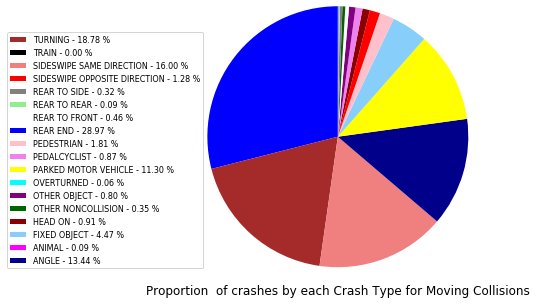

In [60]:
# plotting new pie chart
colors = ['blue','brown','lightcoral','darkblue','yellow','lightskyblue','pink','red','darkred','violet','purple','white', 'darkgreen','grey','lightgreen','magenta','cyan','black']
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
patches, texts = plt.pie(ppie_plot, startangle=90,explode = explode,colors=colors, radius=1.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(ppie_plot.index,percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, ppie_plot.index),
                                          key=lambda ppie_plot: ppie_plot[2],
                                          reverse=True));

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8);
plt.title('Proportion  of crashes by each Crash Type for Moving Collisions', y = -0.25  );
# saving pie chart
plt.savefig('piechart.png', bbox_inches='tight');

The most deadly types of crashes leading in proportions are Turning at 19% and Angle at 13%. I’ll recommend focusing on these as they account for the most fatalities.

## Conclusion
The most types of car accidents are Rear Ends accidents accounting for 30% of car crashes. Followed by Sideswipe Same Direction accidents accounting for 16% of car crashes.

## Recommendation
The most deadly types of crashes leading in proportions are: Turning at 19% and Angle at 13%. I’ll recommend focusing on these by making better and seperate traffic signals for turning as they account for the most fatalities.

In [61]:
# checking the statistics summary of the dataframe 
dx.describe()

,VEHICLE_YEAR,UNIT_NO,NUM_UNITS,POSTED_SPEED_LIMIT,OCCUPANT_CNT,LATITUDE,LONGITUDE,INJURIES_TOTAL,EXCEED_SPEED_LIMIT_I,INJURIES_FATAL,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR,AGE,LANE_CNT,INTERSECTION_RELATED_I,CELL_PHONE_USE,NOT_RIGHT_OF_WAY_I
count,142916.000000,149687.000000,149687.000000,149687.000000,149687.000000,149687.000000,149687.000000,149687.000000,763.000000,149687.000000,149687.000000,149687.000000,149687.000000,149687.000000,149687.000000,45106.000000,513.000000,6153.000000
mean,2011.421359,1.038781,2.034940,28.843393,1.235572,41.861487,-87.670945,0.224856,0.731324,0.000982,4.154228,6.621190,2017.992885,38.862433,2.367099,0.957301,0.730994,0.912075
std,117.346576,0.198734,0.452412,5.971395,0.720992,0.427782,0.879667,0.623656,0.443562,0.032985,1.938076,3.504475,1.202901,16.340181,1.629920,0.202181,0.443876,0.283208
min,1900.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-87.934014,0.000000,0.000000,0.000000,1.000000,1.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,1.000000,2.000000,30.000000,1.000000,41.793095,-87.721945,0.000000,0.000000,0.000000,3.000000,4.000000,2017.000000,25.000000,2.000000,1.000000,0.000000,1.000000
50%,2011.000000,1.000000,2.000000,30.000000,1.000000,41.881625,-87.672146,0.000000,1.000000,0.000000,4.000000,7.000000,2018.000000,35.000000,2.000000,1.000000,1.000000,1.000000
75%,2015.000000,1.000000,2.000000,30.000000,1.000000,41.931982,-87.633762,0.000000,1.000000,0.000000,6.000000,10.000000,2019.000000,50.000000,2.000000,1.000000,1.000000,1.000000
max,9999.000000,6.000000,16.000000,99.000000,41.000000,42.022780,0.000000,21.000000,1.000000,2.000000,7.000000,12.000000,2020.000000,108.000000,99.000000,1.000000,1.000000,1.000000


In [62]:
# checking the shape of the dataframe
dx.shape

(149687, 45)

In [66]:
# grouping the accedents by each year
crashes_by_year = dx.groupby('CRASH_YEAR')['CRASH_YEAR'].count()
crashes_by_year

CRASH_YEAR
2014        1
2015     3463
2016    14521
2017    30909
2018    45086
2019    42135
2020    13572
Name: CRASH_YEAR, dtype: int64

Sample contains 149687 CRASHES WITH INJURIES


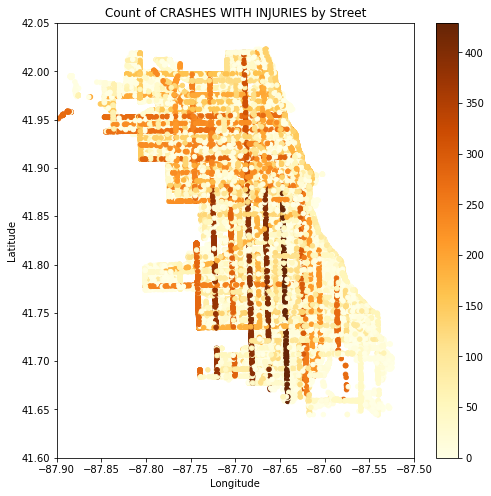

<Figure size 432x288 with 0 Axes>

In [68]:
# plotting a map of chicago streets showing the exact locations of accidents with injuries
dx["INJURY_YN"] = dx["INJURIES_TOTAL"].astype(bool).astype(int)
dx["INJURIES_TOTAL"] = dx["INJURIES_TOTAL"].astype(float)

TITLE = "CRASHES WITH INJURIES"
INJURY_YN = "INJURY_YN"
print("Sample contains {} {}".format(dx[INJURY_YN].count(), TITLE))

count = dx.groupby("STREET")[INJURY_YN].sum()

fig, ax = plt.subplots()

cmap = sns.cubehelix_palette(as_cmap=True)
hue = dx["STREET"].apply(lambda x: count[x])
points = ax.scatter(dx["LONGITUDE"], dx["LATITUDE"], c=hue, s=20, cmap="YlOrBr")

ax.set_xlim((-87.9,-87.50))
ax.set_ylim((41.60,42.05))
fig.colorbar(points)
fig.set_size_inches(8, 8)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Count of {} by Street".format(TITLE))
plt.show()
plt.savefig('crashes_with_injuries.png', bbox_inches='tight');

## Conclusion
From the geo-map showing the proportion of injuries caused by car accidents on each street by their longitude and latitude positions. As we can see from the map, more accidents with injuries occur about south-east from downtown of chicago, more especially on the major streets.

## Recommendation
I'll definitely recommend channeling more law enforcers and first aid responders towards the south central region of chicago in order to keep up with the high concentration of serious accidents that occur within these area.

In [72]:
# converting a column to boolean
dx["INJURY_YN"] = dx["INJURIES_TOTAL"].astype(bool)

In [70]:
weekday_order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]

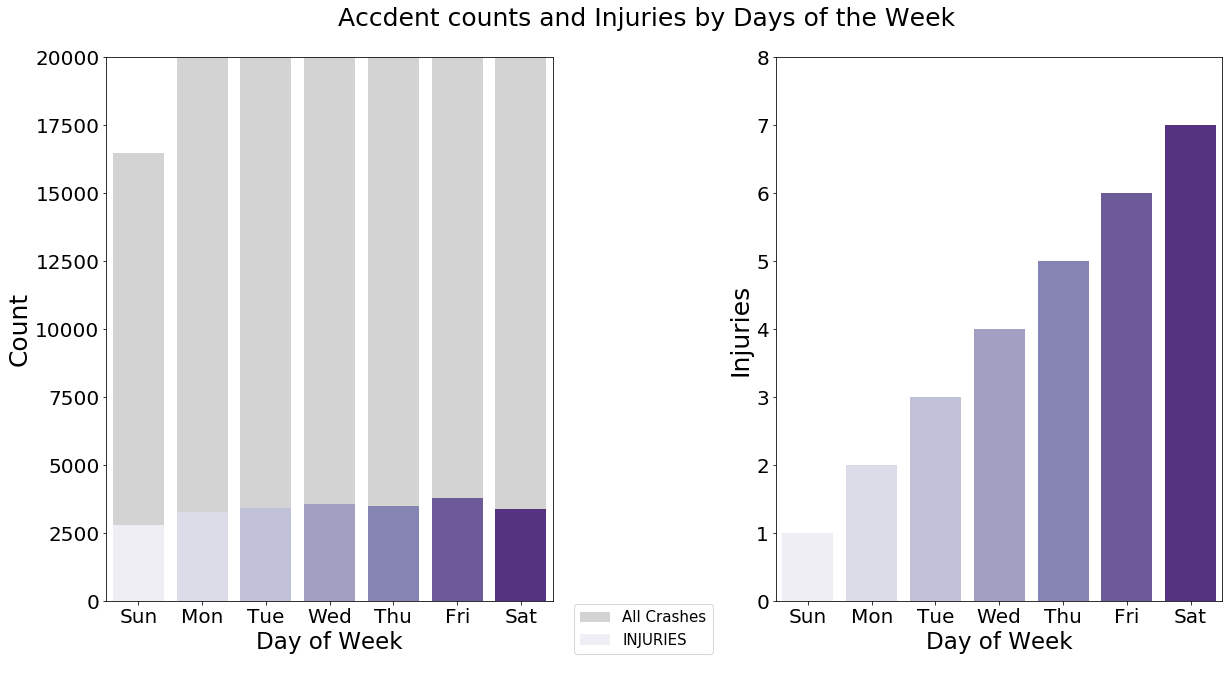

In [71]:
# plotting the distribution of crashes by the day of the week
fig, ax = plt.subplots(1, 2, squeeze=False);

# Find sum of hit and run for each  day of the week
groupedij = dx.groupby('CRASH_DAY_OF_WEEK')['INJURY_YN'].sum();

#Plot total crashes each day
plot_1 = sns.barplot(
    x=groupedij.index, y=dx.groupby("CRASH_DAY_OF_WEEK")["CRASH_DAY_OF_WEEK"].count().values,
    color="lightgray", ax=ax[0][0], label="All Crashes"
);
#Plot INJURIES crashes each day
plot_1_Overlap = sns.barplot(x=groupedij.index, y=groupedij.values,
    palette="Purples", ax=ax[0][0], label="INJURIES");

# Set x and y  axis for first chart
ax[0][0].set_xticklabels(weekday_order);
ax[0][0].set_xlabel("Day of Week",fontsize=23);
ax[0][0].set_ylabel("Count",fontsize=25);
ax[0][0].set_ylim((0, dx.groupby("CRASH_DAY_OF_WEEK")["CRASH_DAY_OF_WEEK"].count().max()));
ax[0][0].tick_params(axis='both', which='major', labelsize=20);
ax[0][0].set_ylim((0, 20000));

# Set chart properties

fig.suptitle("Accdent counts and Injuries by Days of the Week", y=0.95,fontsize=25);
fig.subplots_adjust(wspace=0.5 , hspace = 0.5);
fig.set_size_inches((20, 10));
fig.legend(bbox_to_anchor=(0.5, 0.11),fontsize=15);

# Find mean of hit and run for each  day of the week
groupedijmean = dx.groupby("CRASH_DAY_OF_WEEK")["CRASH_DAY_OF_WEEK"].mean();

#Plot total crashes each day
plot_2 = sns.barplot(x=groupedijmean.index, y=np.ones(len(groupedijmean.index)),
    color="lightgray", ax=ax[0][1], );

#Plot proportion of hit and run each day
plot_2_Overlap = sns.barplot(x=groupedijmean.index, y=groupedijmean.values,
    palette="Purples", ax=ax[0][1]);

# Set X and Y axis for second chart
ax[0][1].set_xticklabels(weekday_order);
ax[0][1].set_xlabel("Day of Week",fontsize=23);
ax[0][1].set_ylabel("Injuries",fontsize=25);
ax[0][1].set_ylim((0, 8));
ax[0][1].tick_params(axis='both', which='major', labelsize=20);

plt.show();

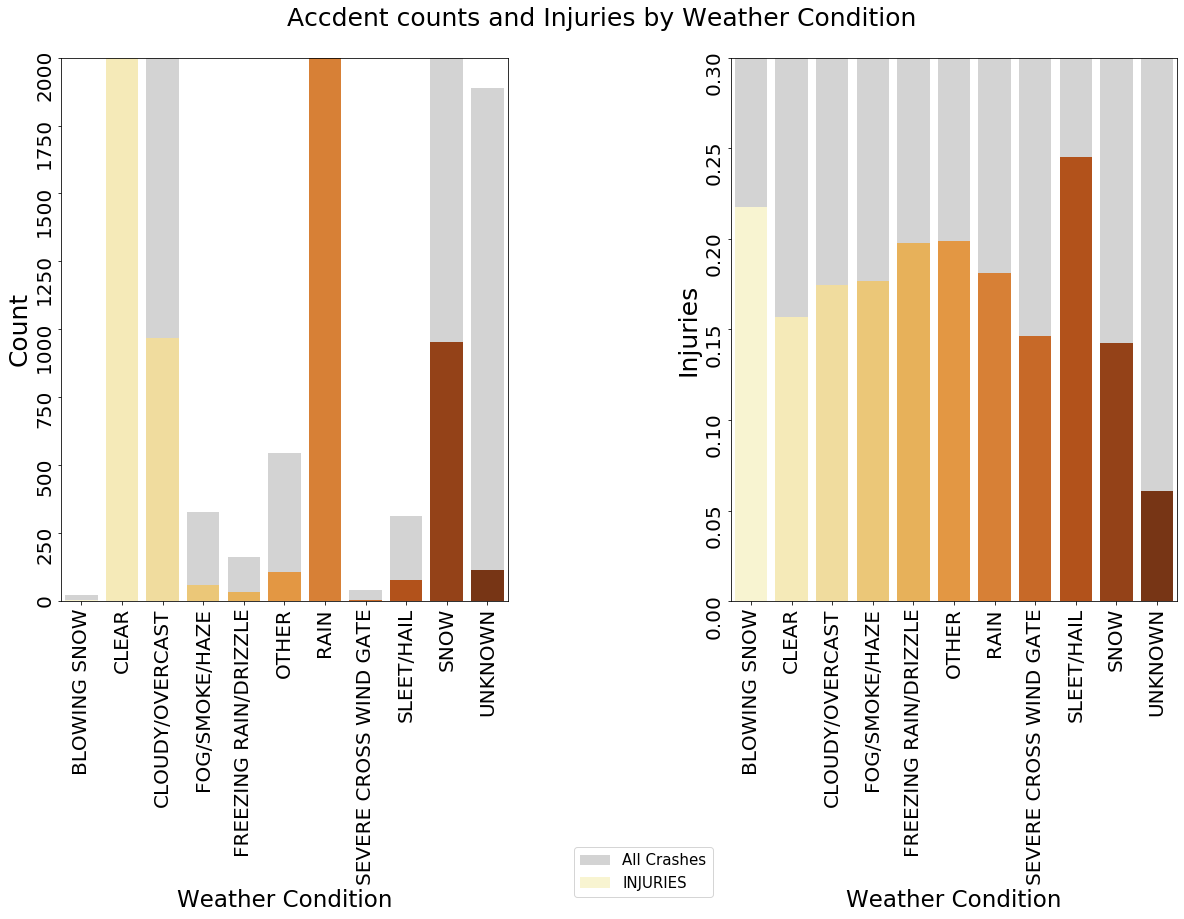

In [127]:
# plotting the distribution of crashed by the weather condition
fig, ax = plt.subplots(1, 2, squeeze=False);

# Find sum of hit and run for each  day of the week
groupedij = dx.groupby('WEATHER_CONDITION')['INJURY_YN'].sum();

#Plot total crashes each day
plot_1 = sns.barplot(
    x=groupedij.index, y=dx.groupby("WEATHER_CONDITION")["CRASH_DAY_OF_WEEK"].count().values,
    color="lightgray", ax=ax[0][0], label="All Crashes"
);
#Plot INJURIES crashes each day
plot_1_Overlap = sns.barplot(x=groupedij.index, y=groupedij.values,
    palette="YlOrBr", ax=ax[0][0], label="INJURIES");

# Set x and y  axis for first chart
# ax[0][0].set_xticklabels(weekday_order);
ax[0][0].set_xlabel("Weather Condition",fontsize=23);
ax[0][0].set_ylabel("Count",fontsize=25);
ax[0][0].set_ylim((0, 2000));
ax[0][0].tick_params(axis='both', which='major', labelsize=20,rotation=90);

# Set chart properties

fig.suptitle("Accdent counts and Injuries by Weather Condition", y=0.95,fontsize=25);
fig.subplots_adjust(wspace=0.5 , hspace = 0.5);
fig.set_size_inches((20, 10));
fig.legend(bbox_to_anchor=(0.5, 0.11),fontsize=15);

# Find mean of hit and run for each  day of the week
groupedijmean = dx.groupby("WEATHER_CONDITION")["INJURY_YN"].mean();

#Plot total crashes each day
plot_2 = sns.barplot(x=groupedijmean.index, y=np.ones(len(groupedijmean.index)),
    color="lightgray", ax=ax[0][1]);

#Plot proportion of hit and run each day
plot_2_Overlap = sns.barplot(x=groupedijmean.index, y=groupedijmean.values,
    palette="YlOrBr", ax=ax[0][1]);

# Set X and Y axis for second chart
#ax[0][1].set_xticklabels(weekday_order);
ax[0][1].set_xlabel("Weather Condition",fontsize=23);
ax[0][1].set_ylabel("Injuries",fontsize=25);
ax[0][1].set_ylim((0, 1));
ax[0][1].set_ylim((0,0.3))
ax[0][1].tick_params(axis='both', which='major', labelsize=20,rotation=90);

plt.show();

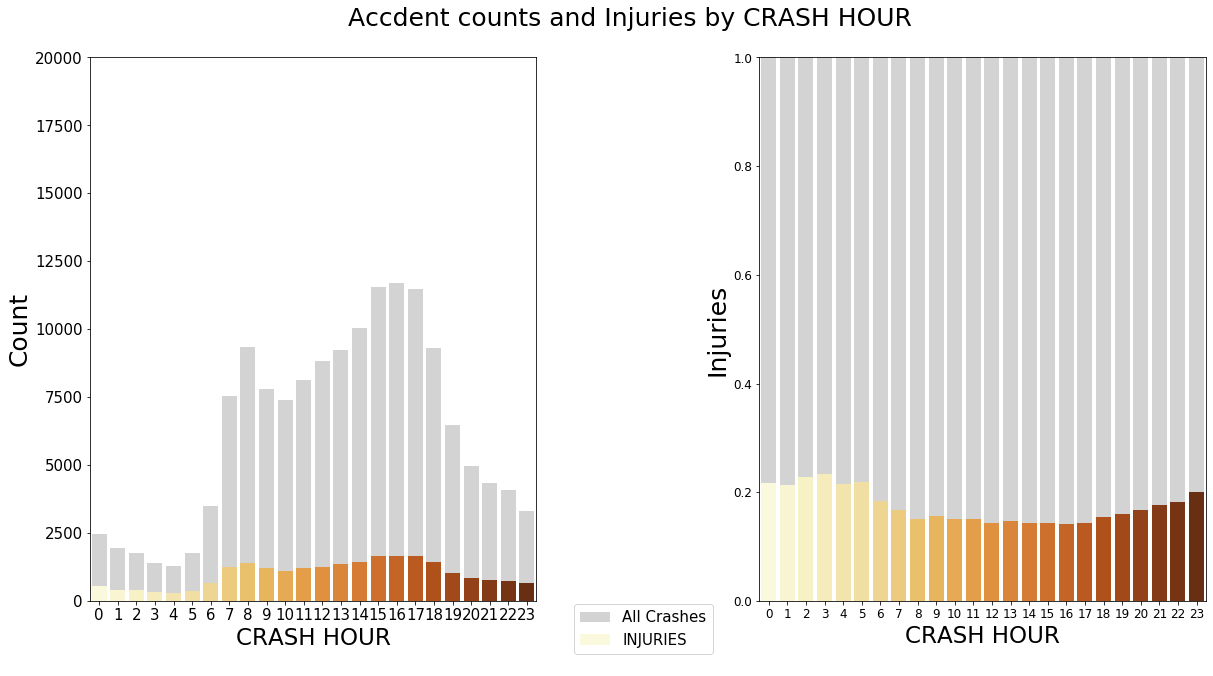

In [128]:
fig, ax = plt.subplots(1, 2, squeeze=False);

# Find sum of hit and run for each  day of the week
groupedij = dx.groupby('CRASH_HOUR')['INJURY_YN'].sum();

#Plot total crashes each daydata:image/png;base64,
plot_1 = sns.barplot(
    x=groupedij.index, y=dx.groupby("CRASH_HOUR")["INJURY_YN"].count().values,
    color="lightgray", ax=ax[0][0], label="All Crashes"
);
#Plot INJURIES crashes each day
plot_1_Overlap = sns.barplot(x=groupedij.index, y=groupedij.values,
    palette="YlOrBr", ax=ax[0][0], label="INJURIES");

# Set x and y  axis for first chart
# ax[0][0].set_xticklabels(weekday_order);
ax[0][0].set_xlabel("CRASH HOUR",fontsize=23);
ax[0][0].set_ylabel("Count",fontsize=25);
ax[0][0].set_ylim((0, 20000));
ax[0][0].tick_params(axis='both', which='major', labelsize=15);

# Set chart properties

fig.suptitle("Accdent counts and Injuries by CRASH HOUR", y=0.95,fontsize=25);
fig.subplots_adjust(wspace=0.5 , hspace = 0.5);
fig.set_size_inches((20, 10));
fig.legend(bbox_to_anchor=(0.5, 0.11),fontsize=15);

# Find mean of hit and run for each  day of the week
groupedijmean = dx.groupby("CRASH_HOUR")["INJURY_YN"].mean();

#Plot total crashes each day
plot_2 = sns.barplot(x=groupedijmean.index, y=np.ones(len(groupedijmean.index)),
    color="lightgray", ax=ax[0][1]);

#Plot proportion of hit and run each day
plot_2_Overlap = sns.barplot(x=groupedijmean.index, y=groupedijmean.values,
    palette="YlOrBr", ax=ax[0][1]);

# Set X and Y axis for second chart
#ax[0][1].set_xticklabels(weekday_order);
ax[0][1].set_xlabel("CRASH HOUR",fontsize=23);
ax[0][1].set_ylabel("Injuries",fontsize=25);
ax[0][1].set_ylim((0,1.0))
ax[0][1].tick_params(axis='both', which='major', labelsize=12);

plt.show();

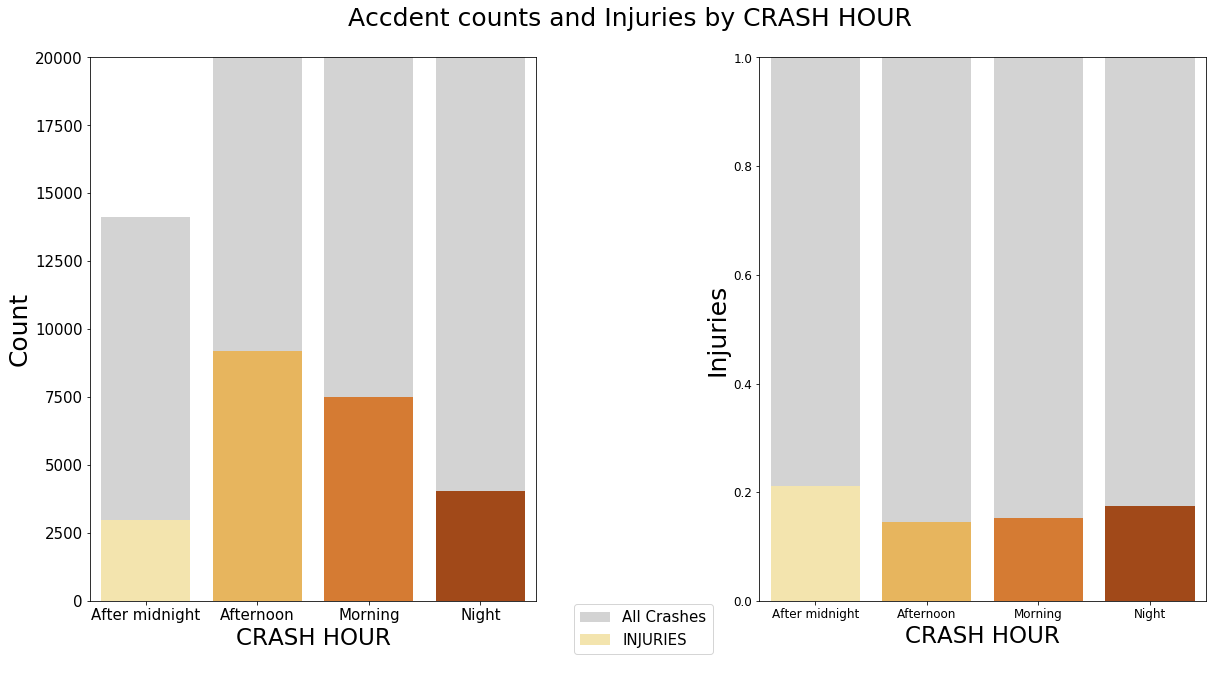

In [129]:
fig, ax = plt.subplots(1, 2, squeeze=False);

# Find sum of hit and run for each  day of the week
groupedij = dx.groupby('TIME')['INJURY_YN'].sum();

#Plot total crashes each daydata:image/png;base64,
plot_1 = sns.barplot(
    x=groupedij.index, y=dx.groupby("TIME")["INJURY_YN"].count().values,
    color="lightgray", ax=ax[0][0], label="All Crashes"
);
#Plot INJURIES crashes each day
plot_1_Overlap = sns.barplot(x=groupedij.index, y=groupedij.values,
    palette="YlOrBr", ax=ax[0][0], label="INJURIES");

# Set x and y  axis for first chart
# ax[0][0].set_xticklabels(weekday_order);
ax[0][0].set_xlabel("CRASH HOUR",fontsize=23);
ax[0][0].set_ylabel("Count",fontsize=25);
ax[0][0].set_ylim((0, 20000));
ax[0][0].tick_params(axis='both', which='major', labelsize=15);

# Set chart properties

fig.suptitle("Accdent counts and Injuries by CRASH HOUR", y=0.95,fontsize=25);
fig.subplots_adjust(wspace=0.5 , hspace = 0.5);
fig.set_size_inches((20, 10));
fig.legend(bbox_to_anchor=(0.5, 0.11),fontsize=15);

# Find mean of hit and run for each  day of the week
groupedijmean = dx.groupby("TIME")["INJURY_YN"].mean();

#Plot total crashes each day
plot_2 = sns.barplot(x=groupedijmean.index, y=np.ones(len(groupedijmean.index)),
    color="lightgray", ax=ax[0][1]);

#Plot proportion of hit and run each day
plot_2_Overlap = sns.barplot(x=groupedijmean.index, y=groupedijmean.values,
    palette="YlOrBr", ax=ax[0][1]);

# Set X and Y axis for second chart
#ax[0][1].set_xticklabels(weekday_order);
ax[0][1].set_xlabel("CRASH HOUR",fontsize=23);
ax[0][1].set_ylabel("Injuries",fontsize=25);
ax[0][1].set_ylim((0,1.0))
ax[0][1].tick_params(axis='both', which='major', labelsize=12);

plt.show();

## Conclusion
From the histogram we can see most accidents occur in clear weather but more accidents with injuries occurs when there’s hail or when it snows. We can also see more accidents occur from 4pm to 8pm.

## Recommendation
My recommendation based on this would be to employ more government trucks to salt the street when it snows to minimize the chances of having a fatal accident.